In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [2]:
blocks = gpd.read_file("zip://DataMerge/dane_blocks_shapes.zip")
blocks = blocks.to_crs("EPSG:4326")

In [3]:
blocks

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,55,025,011504,1,550250115041,Block Group 1,G5030,S,1849504,0,+43.1906083,-089.2482047,"POLYGON ((-89.25928 43.18706, -89.25991 43.187..."
1,55,025,012501,1,550250125011,Block Group 1,G5030,S,3469020,0,+42.9077310,-089.3807759,"POLYGON ((-89.37390 42.91633, -89.37390 42.916..."
2,55,025,001403,1,550250014031,Block Group 1,G5030,S,2141835,8875,+43.0211647,-089.4410349,"POLYGON ((-89.44960 43.02226, -89.44958 43.022..."
3,55,025,013301,1,550250133011,Block Group 1,G5030,S,12509328,0,+43.2478834,-089.3162326,"POLYGON ((-89.34136 43.25267, -89.34141 43.253..."
4,55,025,013301,2,550250133012,Block Group 2,G5030,S,3830201,0,+43.2356950,-089.3326201,"POLYGON ((-89.33398 43.24769, -89.33167 43.247..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,55,025,011102,4,550250111024,Block Group 4,G5030,S,2270321,34087,+43.1140710,-089.4801041,"POLYGON ((-89.49144 43.11327, -89.49143 43.114..."
306,55,025,011102,2,550250111022,Block Group 2,G5030,S,2329858,7529,+43.1263555,-089.4965035,"POLYGON ((-89.50137 43.11301, -89.50137 43.113..."
307,55,025,011102,5,550250111025,Block Group 5,G5030,S,321007,4224,+43.1068366,-089.4780431,"POLYGON ((-89.47114 43.11042, -89.47154 43.110..."
308,55,025,012001,3,550250120013,Block Group 3,G5030,S,7241600,0,+43.0988322,-089.2184686,"POLYGON ((-89.24675 43.10702, -89.24676 43.107..."


In [6]:
madison= gpd.read_file("zip://DataMerge/city_Limit.zip")
madison= madison.to_crs("EPSG:4326")
mdf=gpd.sjoin(blocks, madison)
mdf=mdf[["GEOID10","geometry"]]

In [7]:
madison

,OBJECTID,ShapeSTAre,ShapeSTLen,geometry
0,1,2.322121e+09,1.098845e+06,"POLYGON ((-89.53270 43.08524, -89.53269 43.085..."
1,2,5.373320e+05,3.398131e+03,"POLYGON ((-89.36886 43.10249, -89.36884 43.102..."
2,3,1.488219e+05,3.297206e+03,"POLYGON ((-89.27637 43.11604, -89.28129 43.116..."
3,4,2.675664e+04,7.126214e+02,"POLYGON ((-89.28617 43.02142, -89.28524 43.021..."


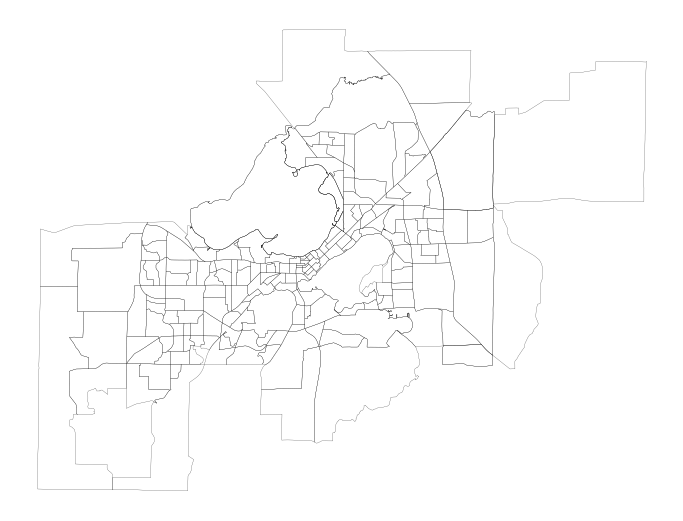

In [8]:
ax = mdf.boundary.plot(color="black",linewidth=0.2, figsize=(12,12))
ax.set_axis_off()

In [79]:
mdf

,GEOID10,geometry
2,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022..."
7,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089..."
8,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103..."
9,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098..."
10,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102..."
...,...,...
36,550250105021,"POLYGON ((-89.27644 43.02638, -89.27629 43.026..."
77,550250102001,"POLYGON ((-89.36699 43.09883, -89.36731 43.098..."
270,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098..."
277,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147..."


In [97]:
df = pd.read_csv("DataMerge/edu_origin.csv")
df['ID']=df['GEO_ID'].map(lambda x:x.split("US")[1])
df

,GEO_ID,Total Education Population,Enrolled at school,Total Family,under poverty level,Education Percentage,Poverty Percentage,ID
0,1500000US550250001001,903,209,239,8,0.231451,0.033473,550250001001
1,1500000US550250001002,1570,378,336,0,0.240764,0.000000,550250001002
2,1500000US550250002011,1238,260,352,21,0.210016,0.059659,550250002011
3,1500000US550250002012,787,118,232,0,0.149936,0.000000,550250002012
4,1500000US550250002021,1061,164,356,10,0.154571,0.028090,550250002021
...,...,...,...,...,...,...,...,...
305,1500000US550250133023,2302,604,730,16,0.262381,0.021918,550250133023
306,1500000US550250137001,4520,1484,1179,12,0.328319,0.010178,550250137001
307,1500000US550250137002,1539,333,307,16,0.216374,0.052117,550250137002
308,1500000US550259917020,0,0,0,0,NaN,NaN,550259917020


In [99]:
cdf = pd.merge(mdf,df,left_on="GEOID10",right_on="ID",how="left")
cdf = cdf.drop(columns=["GEO_ID","ID"])
#cdf = cdf.drop(columns=["GEO_ID","ID","Geographic Area Name"])

In [100]:
cdf

,GEOID10,geometry,Total Education Population,Enrolled at school,Total Family,under poverty level,Education Percentage,Poverty Percentage
0,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022...",2861,802,901,0,0.280322,0.000000
1,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089...",1510,413,412,0,0.273510,0.000000
2,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103...",1093,209,293,40,0.191217,0.136519
3,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098...",985,221,299,0,0.224365,0.000000
4,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102...",902,201,177,0,0.222838,0.000000
...,...,...,...,...,...,...,...,...
195,550250105021,"POLYGON ((-89.27644 43.02638, -89.27629 43.026...",1497,342,453,0,0.228457,0.000000
196,550250102001,"POLYGON ((-89.36699 43.09883, -89.36731 43.098...",1316,292,412,0,0.221884,0.000000
197,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098...",2063,522,322,36,0.253030,0.111801
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",0,0,0,0,NaN,NaN


In [101]:
from sklearn import preprocessing
# cite from https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
# Get column names first

df = cdf.iloc[:,2:]
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
cdf.iloc[:,2:] = scaled_df


,GEOID10,geometry,Total Education Population,Enrolled at school,Total Family,under poverty level,Education Percentage,Poverty Percentage
0,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022...",1.406182,0.610122,2.088579,-0.622341,-0.076308,-0.508973
1,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089...",-0.090735,-0.183131,0.235853,-0.622341,-0.111629,-0.508973
2,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103...",-0.552773,-0.599130,-0.215015,0.630169,-0.538352,0.271371
3,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098...",-0.672438,-0.574660,-0.192282,-0.622341,-0.366463,-0.508973
4,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102...",-0.764403,-0.615444,-0.654516,-0.622341,-0.374383,-0.508973
...,...,...,...,...,...,...,...,...
195,550250105021,"POLYGON ((-89.27644 43.02638, -89.27629 43.026...",-0.105139,-0.327915,0.391194,-0.622341,-0.345247,-0.508973
196,550250102001,"POLYGON ((-89.36699 43.09883, -89.36731 43.098...",-0.305688,-0.429876,0.235853,-0.622341,-0.379328,-0.508973
197,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098...",0.521993,0.039143,-0.105139,0.504918,-0.217828,0.130085
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN


In [104]:
cdf = cdf.sort_values("GEOID10")
cdf

,GEOID10,geometry,Total Education Population,Enrolled at school,Total Family,under poverty level,Education Percentage,Poverty Percentage
71,550250001001,"POLYGON ((-89.48556 43.09155, -89.48554 43.091...",-0.763295,-0.599130,-0.419610,-0.371839,-0.329723,-0.317642
72,550250001002,"POLYGON ((-89.47366 43.07492, -89.47367 43.074...",-0.024254,-0.254504,-0.052096,-0.622341,-0.281428,-0.508973
74,550250002011,"POLYGON ((-89.47608 43.07430, -89.47603 43.074...",-0.392112,-0.495131,0.008525,0.035227,-0.440870,-0.167960
73,550250002012,"POLYGON ((-89.47974 43.06084, -89.47988 43.060...",-0.891823,-0.784699,-0.446132,-0.622341,-0.752407,-0.508973
75,550250002021,"POLYGON ((-89.48601 43.06704, -89.48609 43.067...",-0.588230,-0.690895,0.023680,-0.309213,-0.728374,-0.348410
...,...,...,...,...,...,...,...,...
136,550250117002,"POLYGON ((-89.18683 43.18066, -89.18682 43.180...",0.474349,-0.134190,1.292930,-0.027399,-0.408096,-0.351803
117,550250120021,"POLYGON ((-89.24673 43.10667, -89.24637 43.106...",-1.265221,-0.958032,-0.703770,-0.622341,-1.149624,-0.508973
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN
172,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN


In [106]:
censusdf = censusdf.sort_values("GEOID10")
censusdf

,GEOID10,geometry,Total Population,Preschool,Gradeschooler,Teen,Old People,White,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Preschool Percent,Gradeschooler Percent,Teen Percent,Old People Percent,White Percent,Black or African American alone Percent,Asian alone Percent
71,550250001001,"POLYGON ((-89.48556 43.09155, -89.48554 43.091...",-0.726158,-0.181017,-0.676105,-0.227079,-0.193319,-0.542893,-0.734981,-0.379007,-0.436200,-0.162551,-0.406600,0.598713,-0.680186,-0.033675,0.553089,0.911468,-0.787085,-0.310866
72,550250001002,"POLYGON ((-89.47366 43.07492, -89.47367 43.074...",-0.026994,-0.270325,-0.355589,-0.303469,0.155258,-0.188035,-0.320577,-0.379007,-0.018806,-0.162551,1.605030,-0.319601,-0.507861,-0.347482,0.056796,-0.643260,-0.332217,0.136826
74,550250002011,"POLYGON ((-89.47608 43.07430, -89.47603 43.074...",-0.361700,0.142726,-0.121365,-0.319551,0.324837,-0.114385,-0.734981,-0.080576,-0.327109,-0.162551,-0.349125,0.682344,0.213791,-0.321744,0.714485,0.908249,-0.787085,-0.243085
73,550250002012,"POLYGON ((-89.47974 43.06084, -89.47988 43.060...",-0.874917,-0.225671,-0.842527,-0.291407,-0.132083,-0.790624,-0.734981,-0.379007,-0.346081,-0.162551,-0.406600,0.798533,-1.066850,-0.108746,1.068914,0.437983,-0.787085,0.081967
75,550250002021,"POLYGON ((-89.48601 43.06704, -89.48609 43.067...",-0.584838,-0.259161,-0.466537,-0.219038,0.329547,-0.421036,-0.596846,-0.379007,-0.402999,1.078520,-0.406600,0.193232,-0.280494,-0.082261,1.177684,0.692701,-0.562899,-0.301720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,550250117002,"POLYGON ((-89.18683 43.18066, -89.18682 43.180...",0.469221,-0.024727,0.217643,0.215178,1.549569,0.808246,-0.679727,-0.379007,-0.289164,0.607511,-0.406600,-0.266563,-0.014774,0.128801,0.923222,0.764958,-0.739994,-0.441426
117,550250120021,"POLYGON ((-89.24673 43.10667, -89.24637 43.106...",-1.272314,-0.962464,-0.941148,-0.399961,-0.419424,-1.153516,-0.734981,-0.379007,-0.649640,9.070724,-0.406600,-1.340315,-1.251389,-0.241358,2.142832,1.302284,-0.787085,-0.902606
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,-0.649640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,-0.649640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
tdf = pd.merge(cdf,censusdf,on="GEOID10",how="left")
tdf

,GEOID10,geometry_x,Total Education Population,Enrolled at school,Total Family,under poverty level,Education Percentage,Poverty Percentage,geometry_y,Total Population,...,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Preschool Percent,Gradeschooler Percent,Teen Percent,Old People Percent,White Percent,Black or African American alone Percent,Asian alone Percent
0,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022...",1.406182,0.610122,2.088579,-0.622341,-0.076308,-0.508973,"POLYGON ((-89.44960 43.02226, -89.44958 43.022...",1.351145,...,1.323495,-0.162551,-0.406600,-0.498694,0.765838,0.028332,0.602151,-0.617018,0.299767,0.903963
1,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089...",-0.090735,-0.183131,0.235853,-0.622341,-0.111629,-0.508973,"POLYGON ((-89.33433 43.08995, -89.33429 43.089...",-0.107749,...,-0.426714,-0.162551,-0.406600,-0.079427,0.110886,-0.562080,-0.161305,0.813763,-0.787085,-0.517231
2,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103...",-0.552773,-0.599130,-0.215015,0.630169,-0.538352,0.271371,"POLYGON ((-89.34428 43.10322, -89.34435 43.103...",-0.527460,...,-0.649640,-0.162551,-0.406600,0.376484,0.253764,-0.429313,-0.497286,0.518480,-0.039247,-0.902606
3,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098...",-0.672438,-0.574660,-0.192282,-0.622341,-0.366463,-0.508973,"POLYGON ((-89.36409 43.09863, -89.36409 43.098...",-0.674093,...,-0.516833,-0.162551,-0.406600,-0.206813,-0.673642,-0.360942,-0.190308,0.450586,-0.070897,-0.552223
4,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102...",-0.764403,-0.615444,-0.654516,-0.622341,-0.374383,-0.508973,"POLYGON ((-89.34989 43.10227, -89.34978 43.102...",-0.744222,...,-0.597466,-0.162551,-0.406600,0.323347,-0.475858,-0.562080,-0.758871,0.712807,-0.332618,-0.755362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098...",0.521993,0.039143,-0.105139,0.504918,-0.217828,0.130085,"POLYGON ((-89.36408 43.09883, -89.36409 43.098...",0.530849,...,1.290293,-0.162551,-0.349778,0.288990,-0.949712,-0.233880,-0.610491,-0.705023,0.014742,1.512224
206,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.750465,...,-0.649640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.750465,...,-0.649640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,550250114021,"POLYGON ((-89.24686 43.12177, -89.24686 43.121...",0.914227,0.538749,0.705665,-0.622341,0.115624,-0.508973,"POLYGON ((-89.24686 43.12177, -89.24686 43.121...",0.866618,...,0.673688,-0.162551,-0.180618,-0.841595,1.390895,0.023893,-0.645182,-0.340681,-0.093124,0.533330


In [112]:
df = pd.concat([censusdf,cdf.iloc[:,2:]],axis = 1)

In [116]:
df["SCORE"] = df.iloc[:,2:].sum(axis = 1)

In [2]:
df = gpd.read_file("zip://plot/background/SCORE.zip")

In [3]:
df

,GEOID10,Total Popu,Preschool,Gradeschoo,Teen,Old People,White,Black or A,American I,Asian alon,...,Black or_1,Asian al_1,Total Educ,Enrolled a,Total Fami,under pove,Education,Poverty Pe,SCORE,geometry
0,550250001001,-0.726158,-0.181017,-0.676105,-0.227079,-0.193319,-0.542893,-0.734981,-0.379007,-0.436200,...,-0.787085,-0.310866,-0.763295,-0.599130,-0.419610,-0.371839,-0.329723,-0.317642,-7.215692,"POLYGON ((-89.48556 43.09155, -89.48554 43.091..."
1,550250001002,-0.026994,-0.270325,-0.355589,-0.303469,0.155258,-0.188035,-0.320577,-0.379007,-0.018806,...,-0.332217,0.136826,-0.024254,-0.254504,-0.052096,-0.622341,-0.281428,-0.508973,-3.965460,"POLYGON ((-89.47366 43.07492, -89.47367 43.074..."
2,550250002011,-0.361700,0.142726,-0.121365,-0.319551,0.324837,-0.114385,-0.734981,-0.080576,-0.327109,...,-0.787085,-0.243085,-0.392112,-0.495131,0.008525,0.035227,-0.440870,-0.167960,-2.389149,"POLYGON ((-89.47608 43.07430, -89.47603 43.074..."
3,550250002012,-0.874917,-0.225671,-0.842527,-0.291407,-0.132083,-0.790624,-0.734981,-0.379007,-0.346081,...,-0.787085,0.081967,-0.891823,-0.784699,-0.446132,-0.622341,-0.752407,-0.508973,-8.768108,"POLYGON ((-89.47974 43.06084, -89.47988 43.060..."
4,550250002021,-0.584838,-0.259161,-0.466537,-0.219038,0.329547,-0.421036,-0.596846,-0.379007,-0.402999,...,-0.562899,-0.301720,-0.588230,-0.690895,0.023680,-0.309213,-0.728374,-0.348410,-4.133194,"POLYGON ((-89.48601 43.06704, -89.48609 43.067..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,550250117002,0.469221,-0.024727,0.217643,0.215178,1.549569,0.808246,-0.679727,-0.379007,-0.289164,...,-0.739994,-0.441426,0.474349,-0.134190,1.292930,-0.027399,-0.408096,-0.351803,3.288157,"POLYGON ((-89.18683 43.18066, -89.18682 43.180..."
196,550250120021,-1.272314,-0.962464,-0.941148,-0.399961,-0.419424,-1.153516,-0.734981,-0.379007,-0.649640,...,-0.787085,-0.902606,-1.265221,-0.958032,-0.703770,-0.622341,-1.149624,-0.508973,-4.533930,"POLYGON ((-89.24673 43.10667, -89.24637 43.106..."
197,550259917020,-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,-0.649640,...,NaN,NaN,-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,-13.754623,"POLYGON ((-89.41319 43.14705, -89.41301 43.147..."
198,550259917020,-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,-0.649640,...,NaN,NaN,-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,-13.754623,"POLYGON ((-89.41319 43.14705, -89.41301 43.147..."


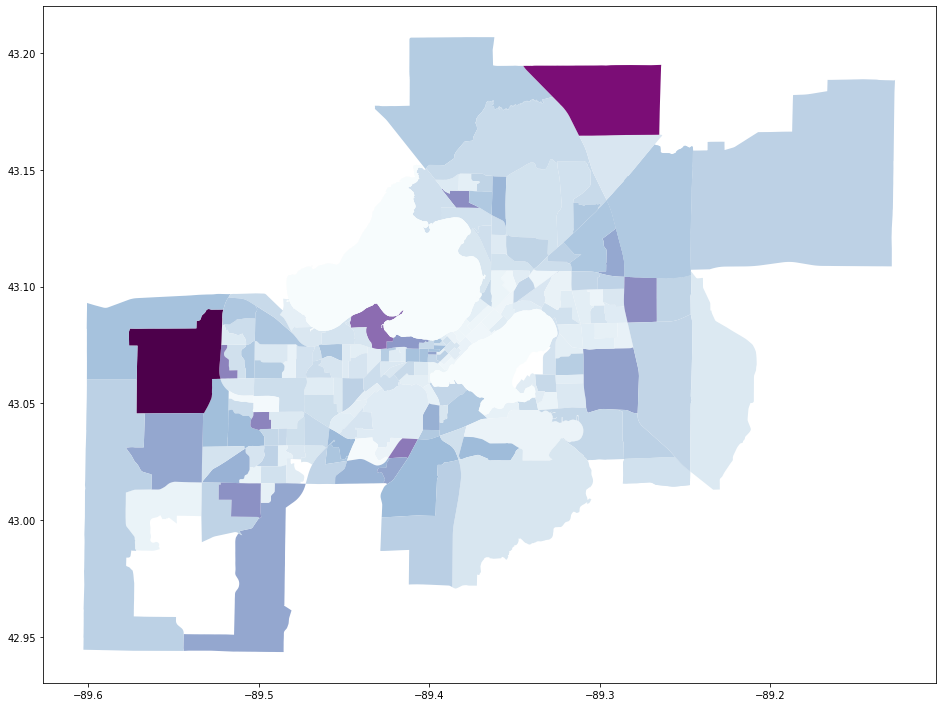

In [4]:
ax = df.plot(column="SCORE",cmap = "BuPu",alpha = 1,figsize=(16,16))

In [119]:
df.SCORE.describe()

count    2.000000e+02
mean    -1.225686e-15
std      9.368888e+00
min     -1.375462e+01
25%     -5.937157e+00
50%     -2.121719e+00
75%      3.370819e+00
max      5.138529e+01
Name: SCORE, dtype: float64

In [120]:
df.to_file("SCORE.shp")

In [121]:
df.sort_values("SCORE")

,GEOID10,geometry,Total Population,Preschool,Gradeschooler,Teen,Old People,White,Black or African American alone,American Indian and Alaska Native alone,...,White Percent,Black or African American alone Percent,Asian alone Percent,Total Education Population,Enrolled at school,Total Family,under poverty level,Education Percentage,Poverty Percentage,SCORE
173,550259917030,"POLYGON ((-89.32590 43.08304, -89.32585 43.082...",-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,...,NaN,NaN,NaN,-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,-13.754623
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,...,NaN,NaN,NaN,-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,-13.754623
172,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.750465,-0.962464,-0.990458,-0.468310,-1.333262,-1.749410,-0.734981,-0.379007,...,NaN,NaN,NaN,-1.763824,-1.025326,-1.325134,-0.622341,NaN,NaN,-13.754623
171,550250014024,"POLYGON ((-89.42706 43.02416, -89.42746 43.023...",-1.053427,-0.783847,-0.694597,-0.375838,-0.645528,-0.896412,-0.734981,-0.379007,...,1.173656,-0.787085,-0.902606,-1.054700,-0.833640,-0.673460,-0.622341,-0.768282,-0.508973,-12.762242
15,550250004082,"POLYGON ((-89.49824 43.05315, -89.49742 43.053...",-1.208560,-0.962464,-0.959639,-0.424084,-0.278108,-1.177620,-0.410364,-0.379007,...,0.209747,0.346130,-0.405493,-1.198741,-0.907051,-1.090229,-0.465777,-0.940175,-0.048003,-12.309326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,550250002043,"POLYGON ((-89.51266 43.06104, -89.51266 43.060...",1.572157,3.536439,0.667599,-0.307489,0.174100,0.053001,1.067679,2.068122,...,-2.721361,0.239269,4.067411,1.357430,0.183927,1.410383,2.759437,-0.438321,0.346055,22.600816
156,550250014023,"POLYGON ((-89.41816 43.03315, -89.41782 43.033...",0.765675,2.096344,1.721606,0.094563,-0.607844,-0.433088,3.547201,6.425206,...,-2.831788,2.432461,-0.265575,0.651630,0.530593,1.050446,3.510943,0.285002,0.694400,24.193863
53,550250032001,"POLYGON ((-89.42798 43.08221, -89.42789 43.082...",1.260827,2.754992,1.512037,-0.303469,-0.984685,-0.408984,2.131318,5.888031,...,-3.277836,1.013580,4.116060,1.190121,1.676629,1.137589,2.602873,1.047251,0.396796,26.877052
105,550250114023,"POLYGON ((-89.26519 43.16678, -89.26520 43.166...",5.636446,4.608138,5.703409,1.107733,4.088533,6.255652,-0.431085,-0.379007,...,0.372881,-0.709259,0.401136,5.615498,2.771686,6.233531,-0.183962,-0.080156,-0.468860,44.021657


In [122]:
df.to_csv("score.csv")